In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import time
from IPython import display
%matplotlib inline

In [2]:
df = pd.read_csv('Assignment5Dataset.csv')
df.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


In [3]:
df.describe()

,X1,X2
count,1500.000000,1500.000000
mean,0.498501,0.251743
std,0.868054,0.496365
min,-1.112339,-0.628397
25%,-0.036013,-0.202562
50%,0.497101,0.246369
75%,1.037322,0.718451
max,2.095098,1.119580


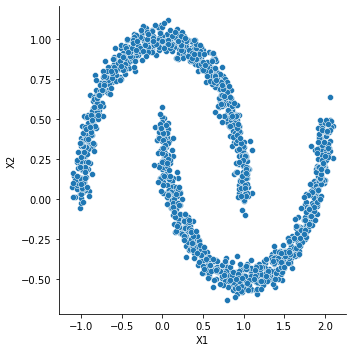

In [4]:
sns.relplot(data = df,x = "X1",y = "X2")

In [5]:
X = df.to_numpy()

<font size = 5><b>2-Means-Clustering</b></font>

In [6]:
# Visualize the clusters for corresponding to assignment C[]
def visualize_clusters(C,X,m1,m2):
    df = pd.DataFrame(X,columns = ['X1','X2'])
    df['Cluster'] = C
    
    # Adding cluster mean points
    df.loc[len(df.index)] = [m1[0][0], m1[1][0], 1]
    df.loc[len(df.index)] = [m2[0][0], m2[1][0], 2]
    
    n = df.shape[0]
    marker_size = np.ones(shape = (n,1))*20
    marker_size[n-2] = 300  # Mean point of cluster 1
    marker_size[n-1] = 300  # Mean point of cluster 2
    
    sns.relplot(data = df,x = "X1",y = "X2",hue = 'Cluster',s = marker_size)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    time.sleep(1.0)

epochs =  6


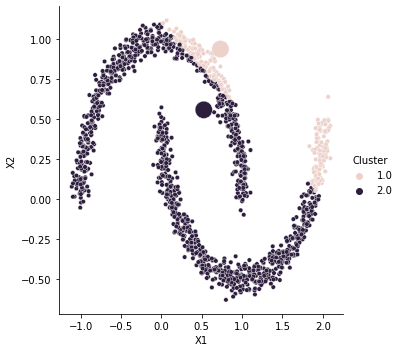

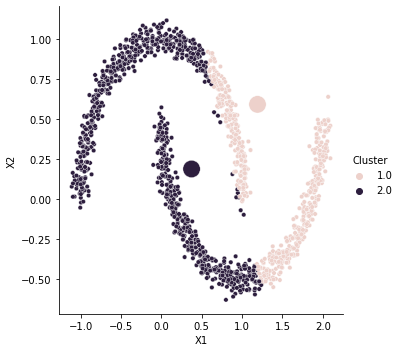

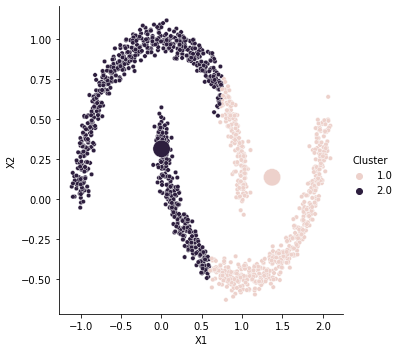

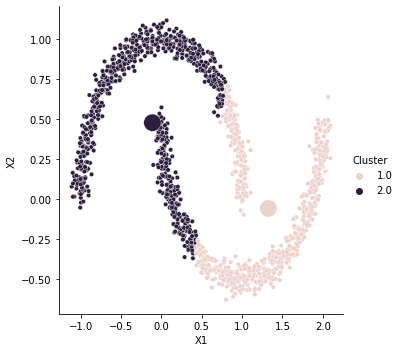

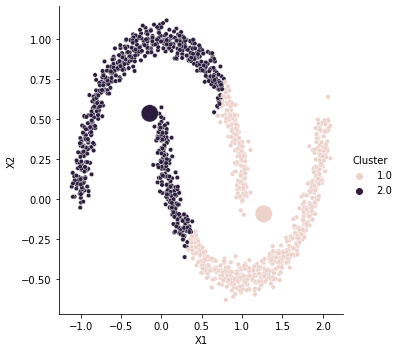

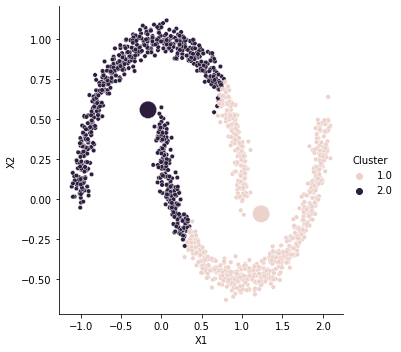

In [7]:
# Assign each point to a cluster whose mean point is closest
def assign_clusters(m1,m2,X):
    n = X.shape[0]
    C = np.zeros(shape = (n,1),dtype = int)
    for i in range(n):
        x = X[i]
        m1_dist = (m1[0]-x[0])**2 + (m1[1]-x[1])**2
        m2_dist = (m2[0]-x[0])**2 + (m2[1]-x[1])**2
        if m1_dist < m2_dist:
            C[i] = 1
        else:
            C[i] = 2
    return C
        
# Update mean points of each cluster
def update_mean(C,X):
    n = X.shape[0]
    m1 = np.zeros(shape = (2,1))
    m2 = np.zeros(shape = (2,1))
    m1_count = 0  # No.of points in cluster_1
    m2_count = 0  # No.of points in cluster_2
    for i in range(n):
        if C[i]==1:
            m1[0] = m1[0]+X[i][0]
            m1[1] = m1[1]+X[i][1]
            m1_count = m1_count+1
        else:
            m2[0] = m2[0]+X[i][0]
            m2[1] = m2[1]+X[i][1]
            m2_count = m2_count+1
            
    m1 = m1/m1_count
    m2 = m2/m2_count
    return (m1,m2)

def norm(m1):
    return m1[0]**2+m1[1]**2


m1 = np.random.rand(2,1)
m2 = np.random.rand(2,1)
m1_pre = np.random.rand(2,1)
m2_pre = np.random.rand(2,1)
epochs = 0 

while (epochs>0 and norm(m1-m1_pre)<1e-3 and norm(m2-m2_pre)<1e-3) == False:
    (m1_pre,m2_pre) = (m1,m2)
    C = assign_clusters(m1,m2,X)
    
    visualize_clusters(C,X,m1,m2)
    
    (m1,m2) = update_mean(C,X)
    epochs = epochs+1
    
print('epochs = ',epochs)

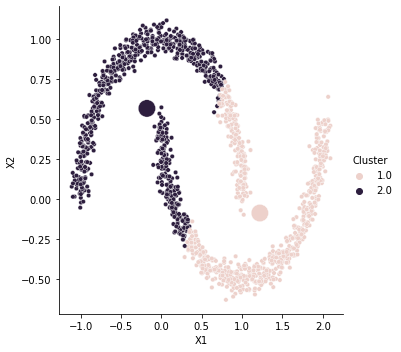

In [8]:
visualize_clusters(C,X,m1,m2)

<font size = 5><b>Making it general to K-Means-Clustering</b></font>

In [9]:
# Assign each point to a cluster whose mean point is closest
def assign_clusters(m,X):
    # X -- data points
    # m -- k*d
    k = m.shape[0]
    (n,d) = X.shape
    dist = np.array([],dtype = int)
    for mi in m:   # mi -- 1*d
        diff = X-mi #  Broadcasting on each row of X
        mi_dist = np.diag(diff @ np.transpose(diff)).reshape(-1,1) # mi_dist -- n*1(Distances from each point to mi)
        if dist.size==0:
            dist = np.array(mi_dist).reshape(-1,1)
        else:
            dist = np.hstack([dist, mi_dist])
    C = np.argmin(dist, axis=1) # dist -- n*k(dist[i][j] = distance between X[i] and m[j])
    return C

# Update the mean points of each cluster
def update_mean(C,X,k):
    (n,d) = X.shape
    #m = np.random.rand(k,d)
    m = np.random.uniform(low=-2, high=2, size=(k,d))
    count = np.zeros(shape = (k,1))
    for i in range(n):
        m[C[i]] = m[C[i]]+X[i]  # X[i] belongs to cluster C[i]
        count[C[i]] = count[C[i]]+1
    count[count==0]+=1 # Handling the case divide by 0
    m = m/count
    return m

In [10]:
def visualize_clusters(C,X,m):
    k = m.shape[0]
    df = pd.DataFrame(X,columns = ['X1','X2'])
    df['Cluster'] = C.astype(int)
    (n,d) = df.shape
    marker_size = np.ones(shape = (n,1))*20
    for i in range(k):  # Adding mean points to df
        ind = len(df.index)
        df.loc[ind] = [m[i][0], m[i][1], i]
        marker_size = np.append(marker_size,300)
        
    
    sns.relplot(data = df,x = "X1",y = "X2",hue = 'Cluster',s = marker_size)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(1.0)

epochs =  28


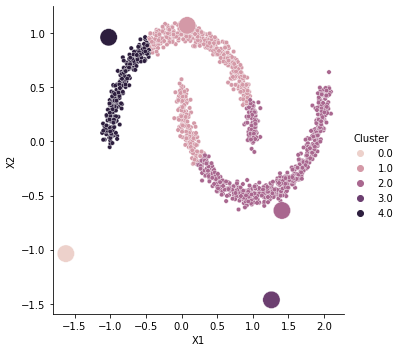

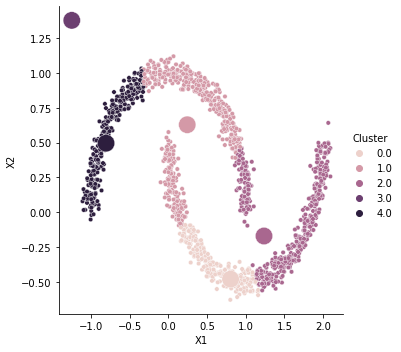

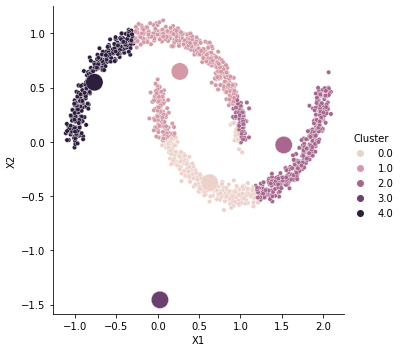

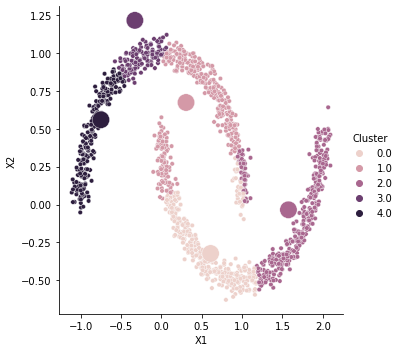

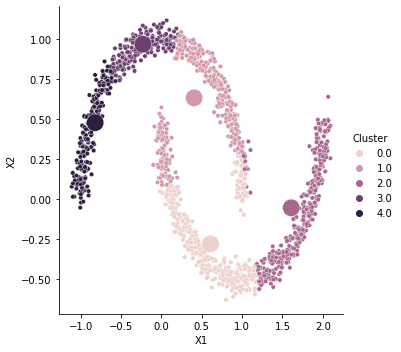

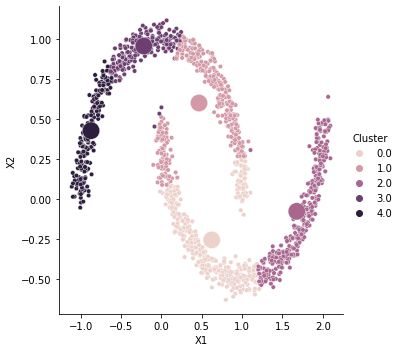

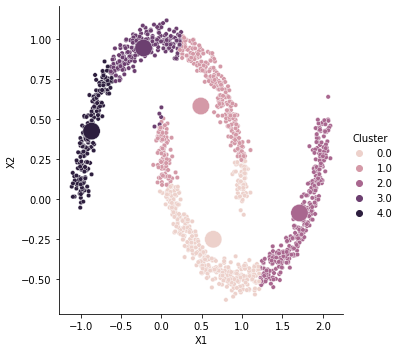

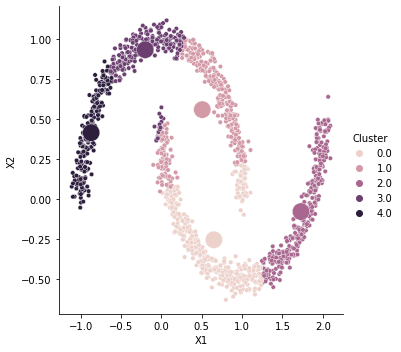

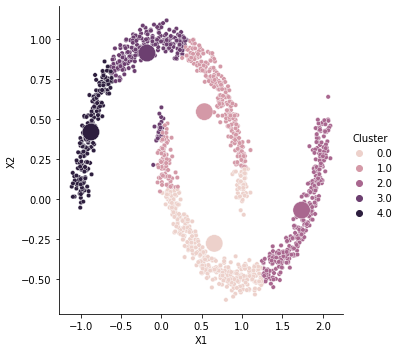

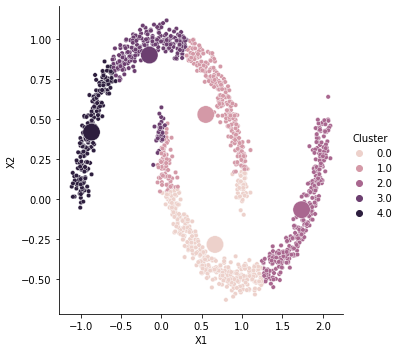

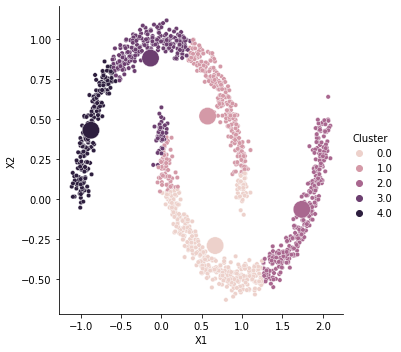

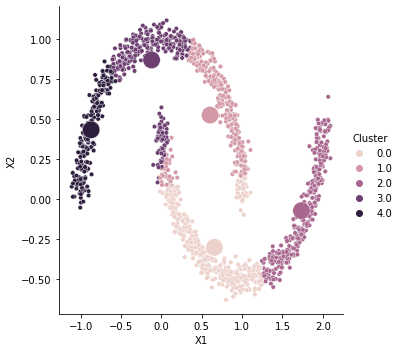

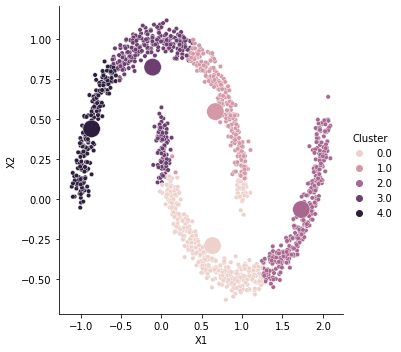

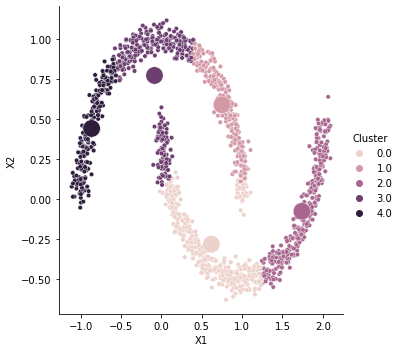

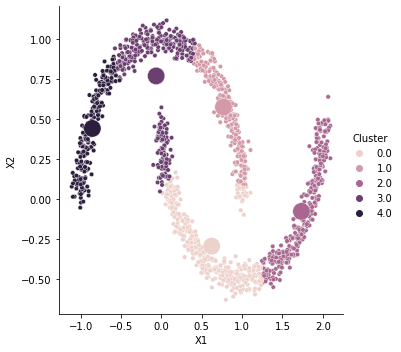

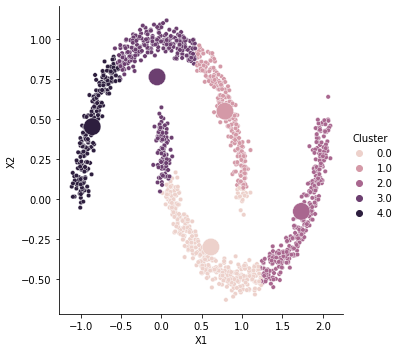

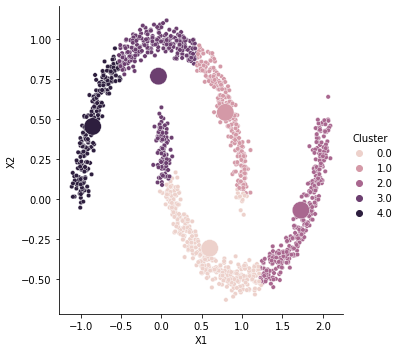

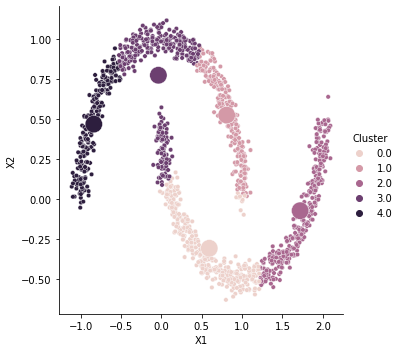

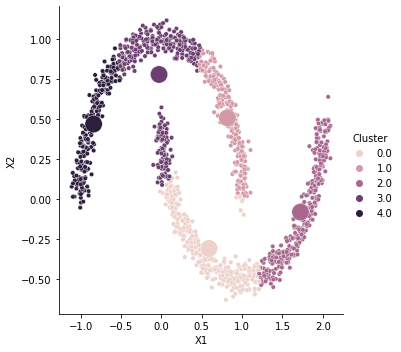

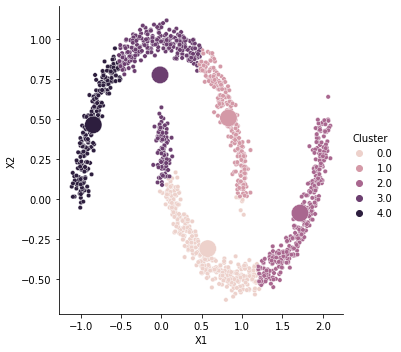

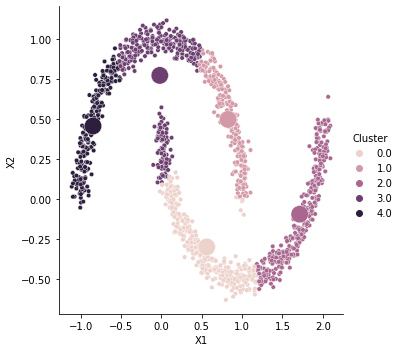

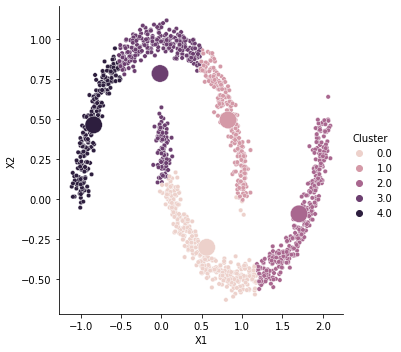

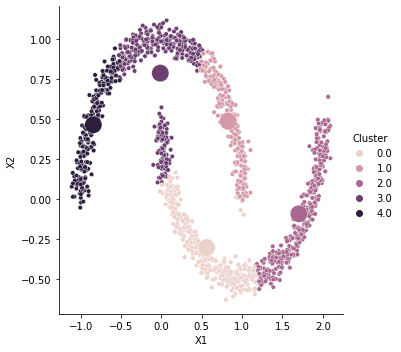

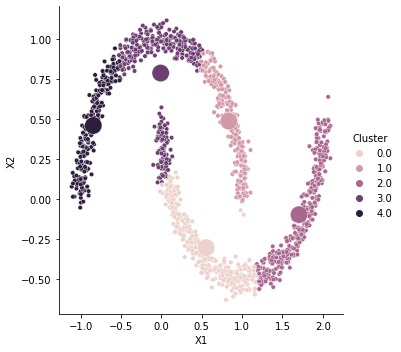

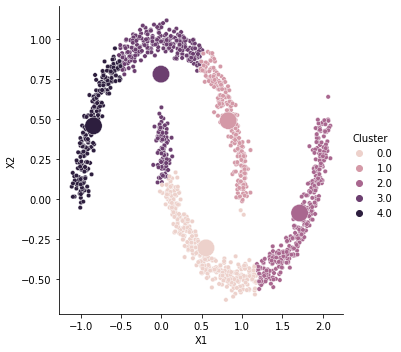

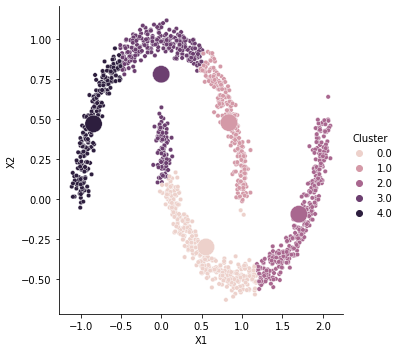

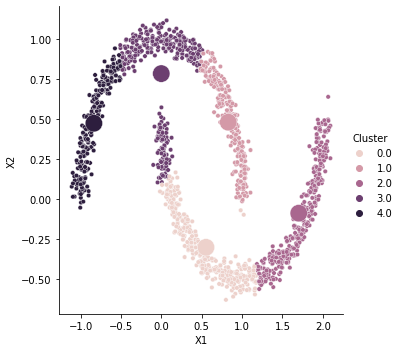

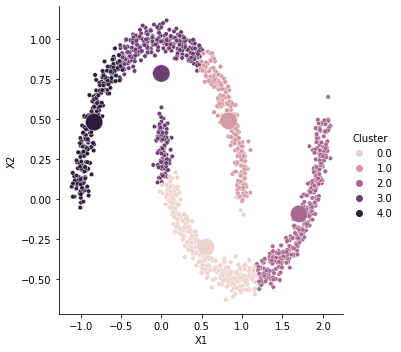

In [11]:
def norm(m,m_pre):
    diff = m-m_pre
    dist = diff @ np.transpose(diff)
    return np.trace(dist)

k = 5
(n,d) = X.shape
#m = np.random.rand(k,d)
#m_pre = np.random.rand(k,d)
m = np.random.uniform(low=-2, high=2, size=(k,d))
m_pre = np.random.uniform(low=-2, high=2, size=(k,d))
epochs = 0 

while (epochs>0 and norm(m,m_pre)<1e-4) == False:
    m_pre = m
    C = assign_clusters(m,X)
    
    visualize_clusters(C,X,m)
    
    m = update_mean(C,X,k)
    epochs = epochs+1
print('epochs = ',epochs)

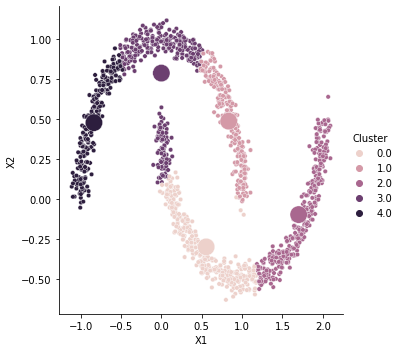

In [12]:
visualize_clusters(C,X,m)